In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

Criação de interface com usuário para upload de arquivo csv.

In [2]:
df = pd.read_csv ('dados/Dados2.csv',sep=';',index_col='Amostra',decimal= ',')

"Fase piloto"

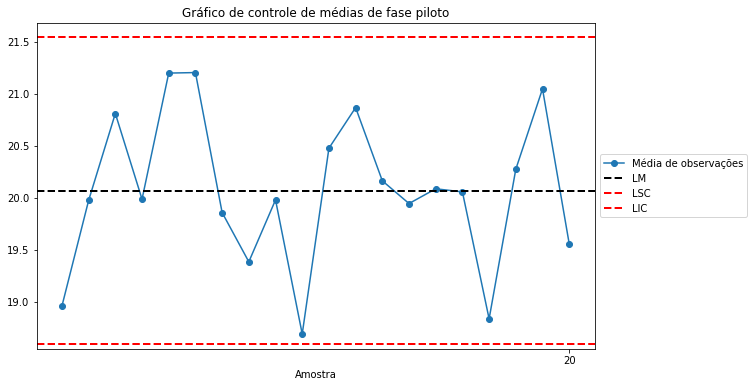

In [3]:
# Cria coluna de média das observações
df['Média'] = df[['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6']].mean(axis=1)

# Seleciona as primeiras 20 amostras
amostras_20 =  df[['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6']].loc[1:20]

# Calcula a média das médias das primeiras 20 amostras
media_20 = df['Média'].loc[1:20].mean(axis=0)

# Calcula a média dos desvios padrões das primeiras 20 amostras
desvio_20 = amostras_20.std(axis=1).mean(axis=0)

# Calcula o desvio padrão amostral dividindo a média dos desvios-padrões das
# amostras pela raiz do tamanho das amostras
desvio_amostral = desvio_20 / math.sqrt(amostras_20.shape[0])

LIC = media_20 - 3 * desvio_amostral
LSC = media_20 + 3 * desvio_amostral

# Definição do tamanho da figura, marcação do eixo 'x' e seu título
grafico_1 = plt.figure(figsize = (10,6))
plt.xticks(np.arange(20, 42, 2))
plt.title('Gráfico de controle de médias de fase piloto')

# Plota os dados da fase piloto e linhas de controle
amostras_20.mean(axis=1).plot( marker="o",label ='Média de observações')
plt.axhline(media_20, color = 'black', linestyle = 'dashed', linewidth = 2,label= 'LM')
plt.axhline(LSC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LSC')
plt.axhline(LIC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LIC')

# Cria a legenda e coloca-a do lado exterior da figura
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

In [4]:
desvio_amostral

0.4908623565309318

"Produção em andamento"

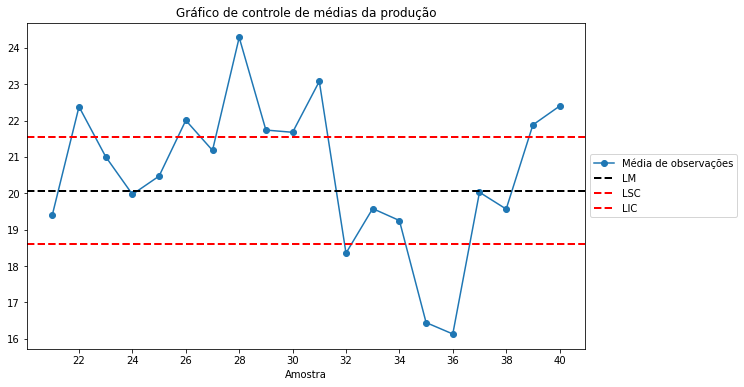

In [5]:
# Seleciona as ultimas 20 amostras
amostras_40 =  df[['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6']].loc[21:40]

# Definição do tamanho da figura, marcação do eixo 'x' e seu título
grafico_2 = plt.figure(figsize = (10,6))
plt.xticks(np.arange(20, 42, 2))
plt.title('Gráfico de controle de médias da produção')

# Plota os dados da fase piloto e linhas de controle
amostras_40.mean(axis=1).plot(marker="o",label ='Média de observações')
plt.axhline(media_20, color = 'black', linestyle = 'dashed', linewidth = 2,label= 'LM')
plt.axhline(LSC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LSC')
plt.axhline(LIC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LIC')

# Cria a legenda e coloca-a do lado exterior da figura
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))   
 

In [6]:
# Cria coluna booleana onde valores dentro dos limites de controle tem valor True
df['Limite 3 Desvios'] = (df['Média'] >= LIC) & (df['Média'] <= LSC)

In [7]:
# Cria lista com valores fora dos limites de controle
fora_3 = df.index[df['Limite 3 Desvios'] == False].tolist()

In [8]:
# Calcula novos limites de controle com +- 2 desvios-padrão amostral
LIC2 = media_20 - 2 * desvio_amostral
LSC2 = media_20 + 2 * desvio_amostral

In [9]:
# Cria coluna booleana onde valores dentro dos novos limites de controle tem valor True
df['Limite 2 Desvios'] = (df['Média'] >= LIC2) & (df['Média'] <= LSC2)

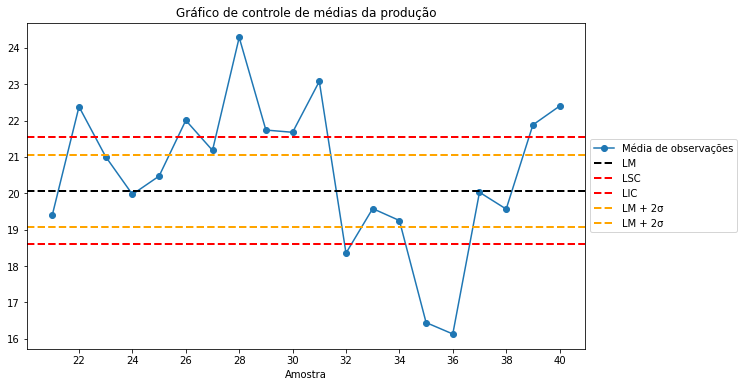

In [10]:
# Seleciona as ultimas 20 amostras
amostras_40 =  df[['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6']].loc[21:40]

# Definição do tamanho da figura, marcação do eixo 'x' e seu título
grafico_3 = plt.figure(figsize = (10,6))
plt.xticks(np.arange(20, 42, 2))
plt.title('Gráfico de controle de médias da produção')

# Plota os dados da fase piloto e linhas de controle
amostras_40.mean(axis=1).plot(marker="o",label ='Média de observações')
plt.axhline(media_20, color = 'black', linestyle = 'dashed', linewidth = 2,label= 'LM')
plt.axhline(LSC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LSC')
plt.axhline(LIC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LIC')
plt.axhline(LSC2, color = 'orange', linestyle = 'dashed', linewidth = 2,label = 'LM + 2σ')
plt.axhline(LIC2, color = 'orange', linestyle = 'dashed', linewidth = 2,label = 'LM + 2σ')

# Cria a legenda e coloca-a do lado exterior da figura
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))


In [11]:
# Cria lista com valores fora dos novos limites de controle.

fora_2 = df.loc[21:40].index[df['Limite 2 Desvios'].loc[21:40]==False].tolist()

In [12]:
# Cria lista com valores onde há 2 médias amostrais consecutivas fora do intervalo
# entre média amostral ± 2 desvios-padrão amostral.
conseq = []

for i in range(len(fora_2)-1):
    if fora_2[i]+1 == fora_2[i+1]:
        conseq.append(fora_2[i])
        conseq.append(fora_2[i+1])
    
conseq_2 = list(dict.fromkeys(conseq))
conseq_2

[26, 27, 28, 29, 30, 31, 32, 35, 36, 39, 40]

In [13]:
# Cria lista com valores onde há há 3 médias amostrais consecutivas 
# em que, pelo menos, 2 valores estão fora do intervalo entre
# média amostral ± 2 desvios-padrão amostral.

conseq_3 = []

for i in range(22,40):
    if i in fora_2 and (i-1 in fora_2 or i+1 in fora_2):
        list = []
        list.append(i-1)
        list.append(i)
        list.append(i+1)
        conseq_3.append(list)
    elif (i not in fora_2) and (i-1 in fora_2) and (i+1 in fora_2):
        list = []
        list.append(i-1)
        list.append(i)
        list.append(i+1)
        conseq_3.append(list)
conseq_3

[[25, 26, 27],
 [26, 27, 28],
 [27, 28, 29],
 [28, 29, 30],
 [29, 30, 31],
 [30, 31, 32],
 [31, 32, 33],
 [34, 35, 36],
 [35, 36, 37],
 [38, 39, 40]]

In [14]:
# Cria arquivo pdf com nome 'Gráficos.pdf' e salva os 3 gráficos em cada página.

with PdfPages('graficos/Atividade_3_Graficos.pdf') as pdf:
    pdf.savefig(grafico_1)
    pdf.savefig(grafico_2)
    pdf.savefig(grafico_3)

In [16]:
# Cria arquivo txt com nome 'Informações.txt' e salva os valores LM, LSC, LIC e os 
# resultados das verificaçõesde valores fora dos intervalos

with open('informacoes/Atividade_3_Informacoes.txt', 'w') as text_file:
    text_file.write(' LM = {:.2f}\n'.format(media_20))
    text_file.write(' LIC = {:.2f}\n'.format(LIC))
    text_file.write(' LSC = {:.2f}\n'.format(LSC))
    text_file.write(' As amostras: {} apresentam médias amostrais fora do intervalo entre média amostral ± 3 desvios-padrão amostral;\n'.format(fora_3))
    text_file.write(' As amostras: {} apresentam 2 médias amostrais consecutivas fora do intervalo entre média amostral ± 2 desvios-padrão amostral;\n'.format(conseq_2))
    text_file.write(' As amostras: {} apresentam pelo menos 2 valores que estão fora do intervalo entre média amostral ± 2 desvios-padrão amostral;\n'.format(conseq_3))